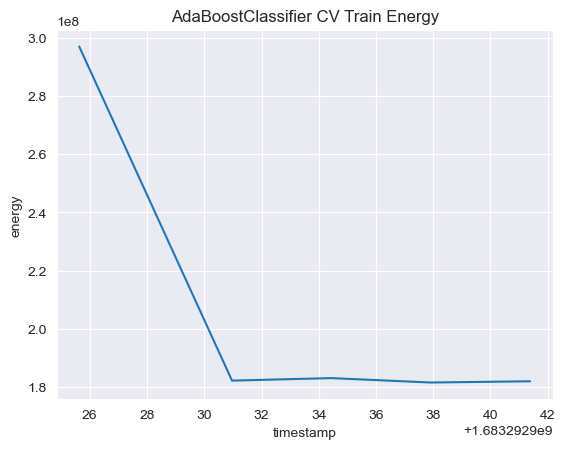

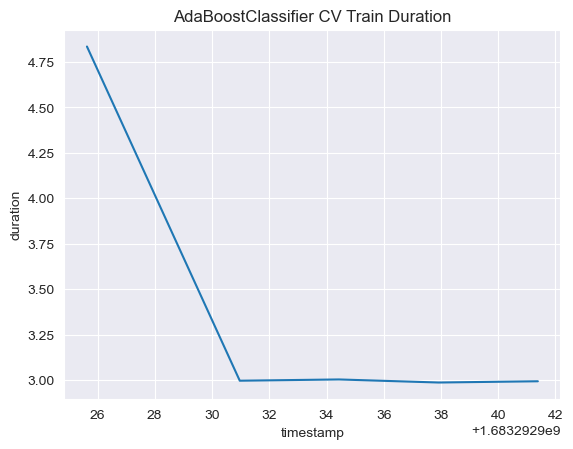

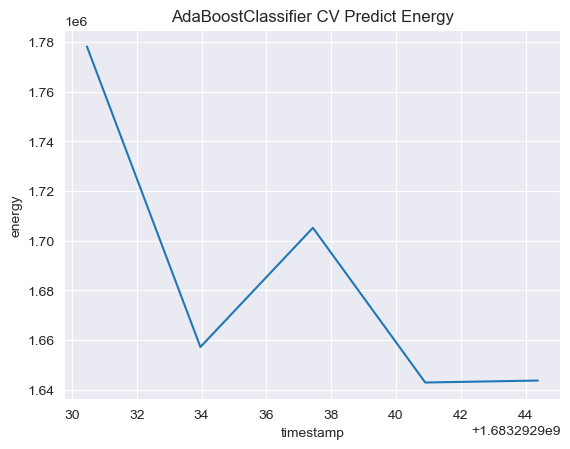

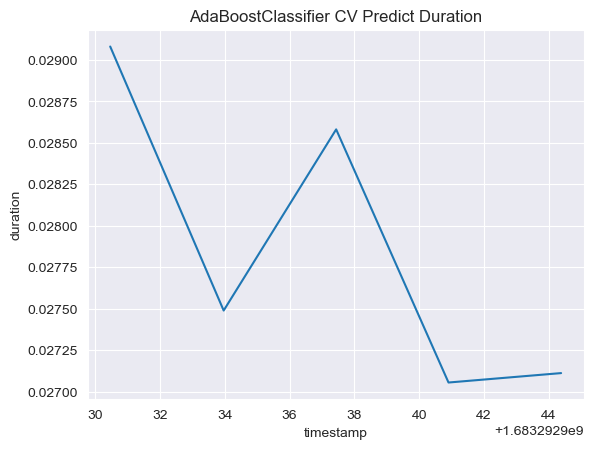

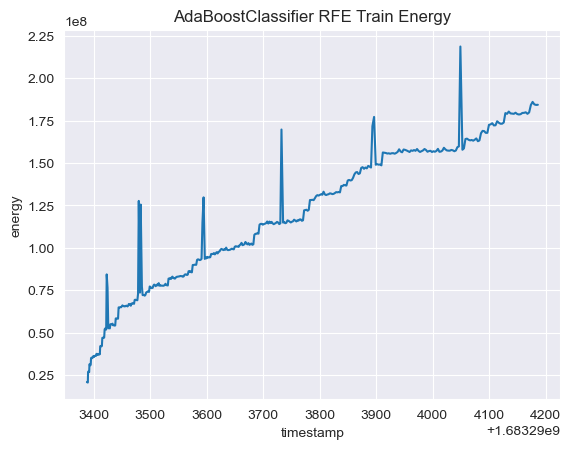

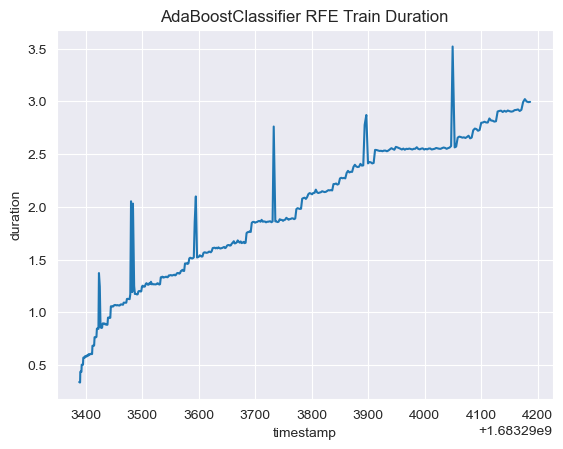

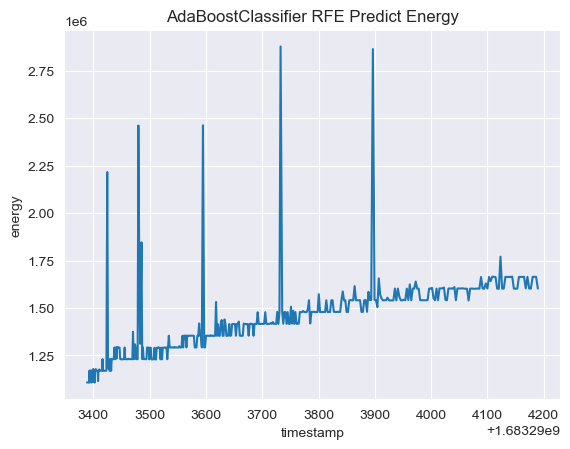

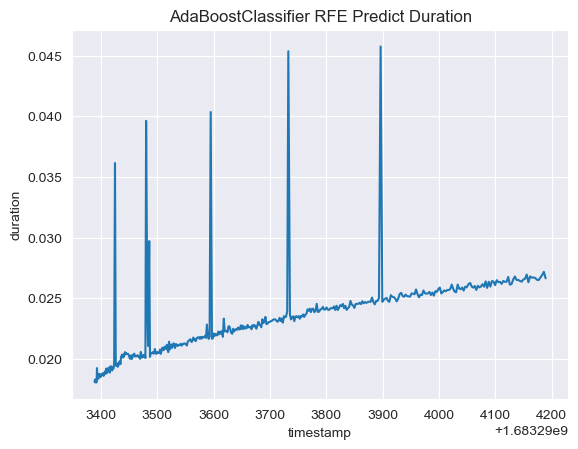

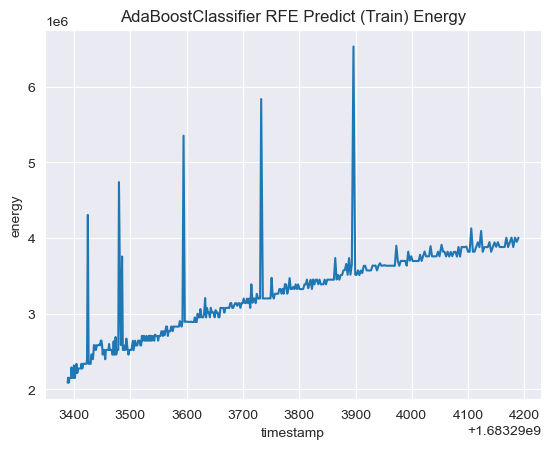

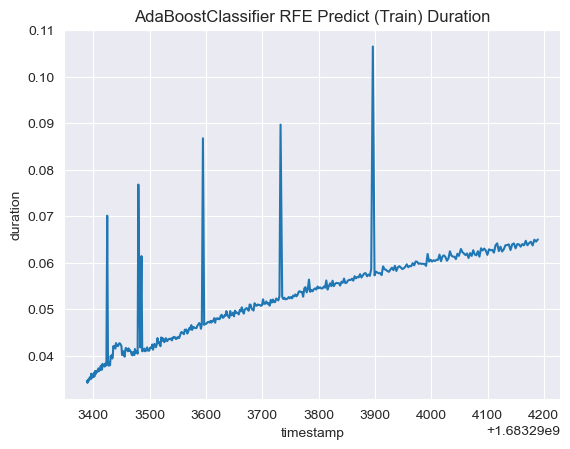

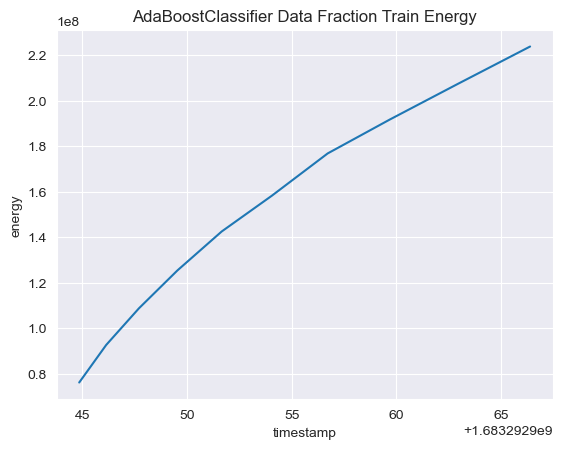

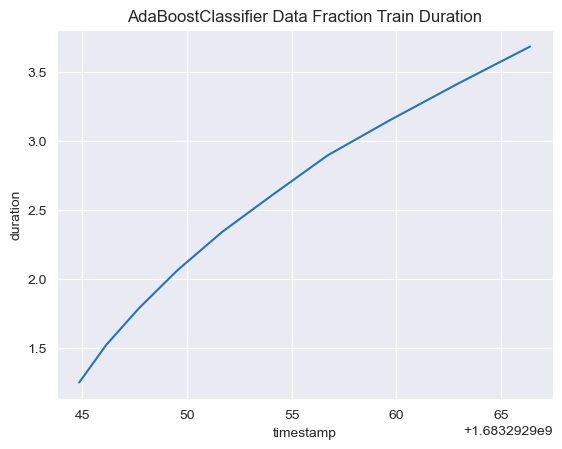

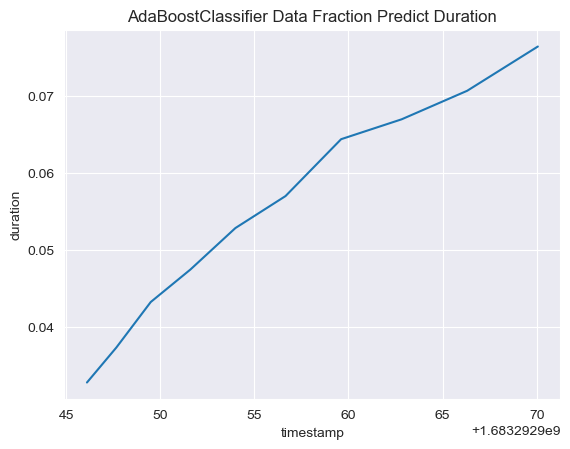

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_power_measurements(
        model,
        exp_id,
        core_directory='/Users/gabriel/Dropbox/Research/Serrano/Experiments/Results/Energy'
):
    #
    model_dir = os.path.join(core_directory, exp_id+"/models")
# 'Model_AdaBoostClassifier_ada_exp_iteration_0_cv_power_report.csv'
    # Plot CV
    df_cv = pd.read_csv(os.path.join(model_dir, 'Model_'+model+'_'+exp_id+'_iteration_0_cv_power_report.csv'), index_col='timestamp')
    df_cv_train = df_cv[df_cv['tag'].str.contains('train')]
    df_cv_predict = df_cv[df_cv['tag'].str.contains('predict')]

    sns.lineplot(data=df_cv_train, x='timestamp', y='energy').set(title=f'{model} CV Train Energy')
    plt.show()
    sns.lineplot(data=df_cv_train, x='timestamp', y='duration').set(title=f'{model} CV Train Duration')
    plt.show()

    sns.lineplot(data=df_cv_predict, x='timestamp', y='energy').set(title=f'{model} CV Predict Energy')
    plt.show()
    sns.lineplot(data=df_cv_predict, x='timestamp', y='duration').set(title=f'{model} CV Predict Duration')
    plt.show()
    # Plot RFE
    df_rfe = pd.read_csv(os.path.join(model_dir, 'Model_'+model+'_'+exp_id+'_rfe_power_report.csv'), index_col='timestamp')

    df_rfe_train = df_rfe[df_rfe['tag'].str.contains(f'{model}_train')]
    df_rfe_predict = df_rfe[df_rfe['tag'].str.contains(f'predict_test')]
    df_rfe_predict_train = df_rfe[df_rfe['tag'].str.contains(f'predict_train')]

    # Filtering negative values
    sns.lineplot(data=df_rfe_train[~(df_rfe_train['energy'] < 0)], x='timestamp', y='energy').set(title=f'{model} RFE Train Energy')
    plt.show()

    sns.lineplot(data=df_rfe_train[~(df_rfe_train['energy'] < 0)], x='timestamp', y='duration').set(title=f'{model} RFE Train Duration')
    plt.show()

    sns.lineplot(data=df_rfe_predict[~(df_rfe_predict['energy'] < 0)], x='timestamp', y='energy').set(title=f'{model} RFE Predict Energy')
    plt.show()

    sns.lineplot(data=df_rfe_predict[~(df_rfe_predict['energy'] < 0)], x='timestamp', y='duration').set(title=f'{model} RFE Predict Duration')
    plt.show()

    sns.lineplot(data=df_rfe_predict_train[~(df_rfe_predict_train['energy'] < 0)], x='timestamp', y='energy').set(title=f'{model} RFE Predict (Train) Energy')
    plt.show()

    sns.lineplot(data=df_rfe_predict_train[~(df_rfe_predict_train['energy'] < 0)], x='timestamp', y='duration').set(title=f'{model} RFE Predict (Train) Duration')
    plt.show()

    # Plot data fraction

    df_df = pd.read_csv(os.path.join(model_dir, 'Model_'+model+'_'+exp_id+'_datafraction_power_report.csv'), index_col='timestamp')
    df_df_train = df_df[df_df['tag'].str.contains(f'{model}_train')]
    df_df_predict = df_df[df_df['tag'].str.contains(f'{model}_predict')]

    sns.lineplot(data=df_df_train[~(df_df_train['energy'] < 0)], x='timestamp', y='energy').set(title=f'{model} Data Fraction Train Energy')
    plt.show()

    sns.lineplot(data=df_df_train[~(df_df_train['energy'] < 0)], x='timestamp', y='duration').set(title=f'{model} Data Fraction Train Duration')
    plt.show()

    sns.lineplot(data=df_df_predict[~(df_df_predict['energy'] < 0)], x='timestamp', y='energy').set(title=f'{model} Data Fraction Predict Energy')
    plt.show()

    sns.lineplot(data=df_df_predict[~(df_df_predict['energy'] < 0)], x='timestamp', y='duration').set(title=f'{model} Data Fraction Predict Duration')
    plt.show()

    # Plot validation curve
    df_vc = pd.read_csv(os.path.join(model_dir, 'Model_'+model+'_'+exp_id+'_validation_curves_power_report.csv'), index_col='timestamp')
    df_vc_train = df_vc[df_vc['tag'].str.contains(f'train')]
    df_vc_predict = df_vc[df_vc['tag'].str.contains(f'predict')]

    sns.lineplot(data=df_vc_train[~(df_vc_train['energy'] < 0)], x='timestamp', y='energy').set(title=f'{model} Validation Curve Train Energy')
    plt.xticks(rotation=45)
    plt.show()
    sns.lineplot(data=df_vc_train[~(df_vc_train['energy'] < 0)], x='timestamp', y='duration').set(title=f'{model} Validation Curve Train Duration')
    plt.show()

    sns.lineplot(data=df_vc_predict[~(df_vc_predict['energy'] < 0)], x='timestamp', y='energy').set(title=f'{model} Validation Curve Predict Energy')
    plt.show()
    sns.lineplot(data=df_vc_predict[~(df_vc_predict['energy'] < 0)], x='timestamp', y='duration').set(title=f'{model} Validation Curve Predict Duration')
    plt.show()

    return df_cv, df_rfe, df_df, df_vc

ada_cv, ada_rfe, ada_df, ada_vc = plot_power_measurements('AdaBoostClassifier', 'ada_exp')


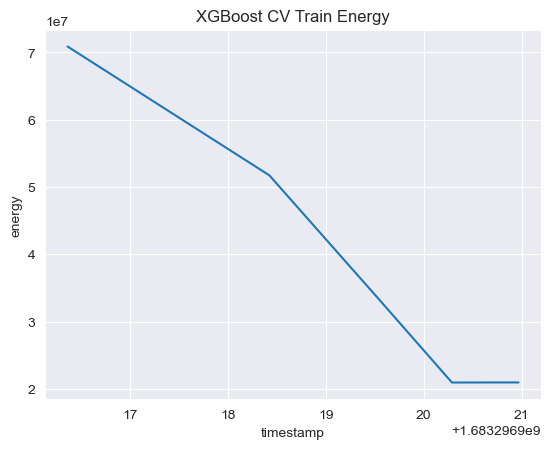

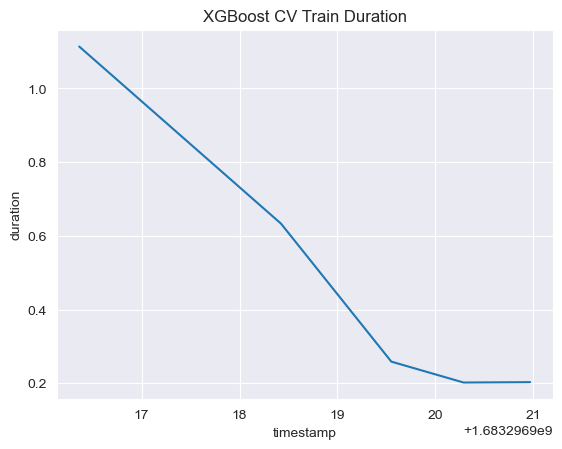

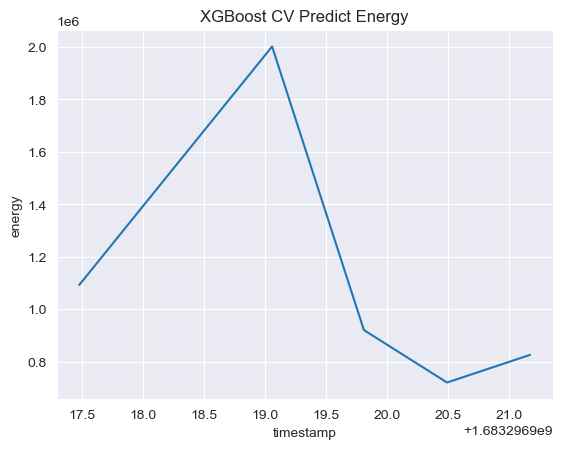

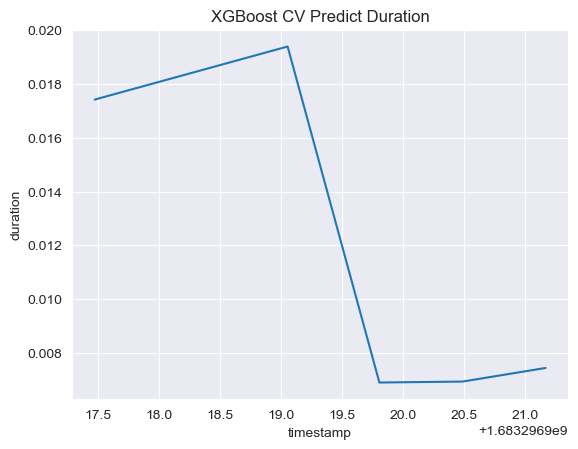

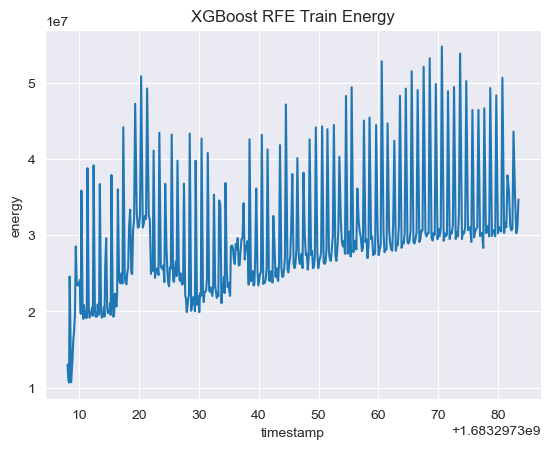

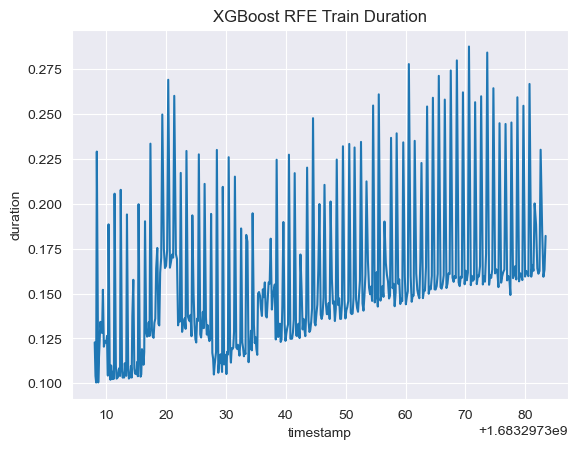

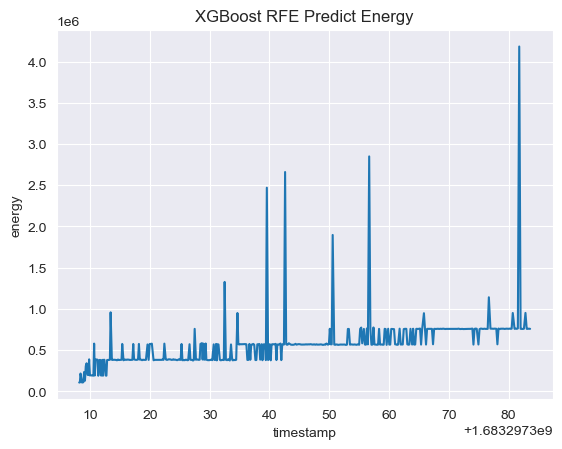

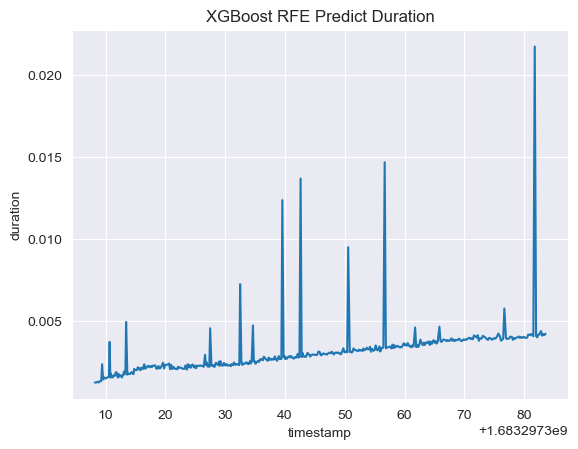

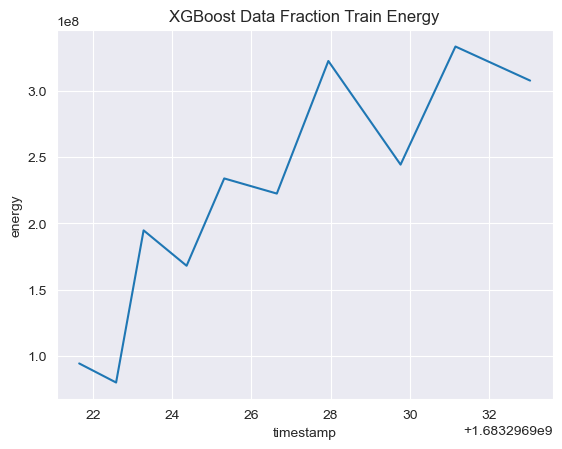

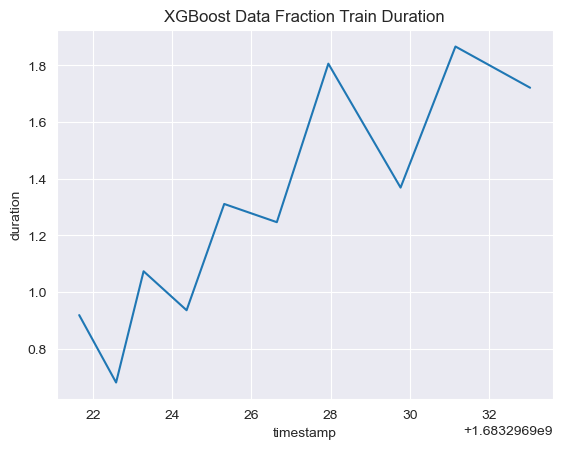

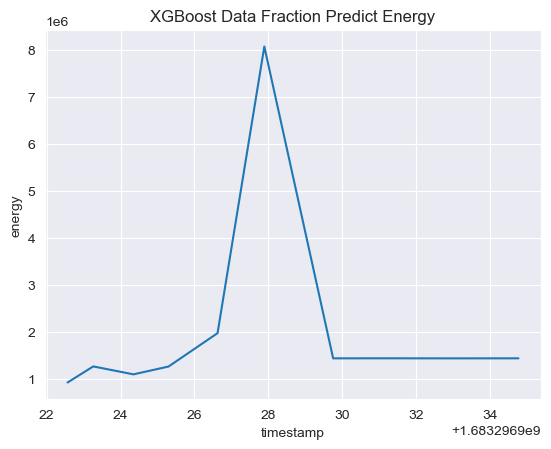

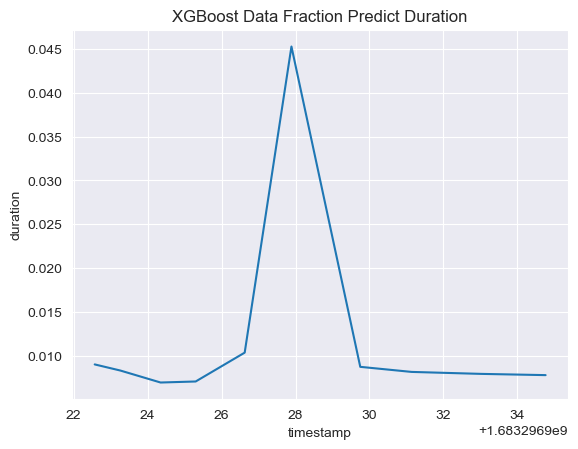

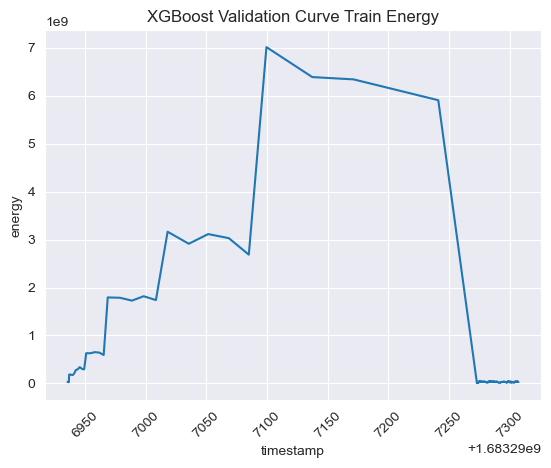

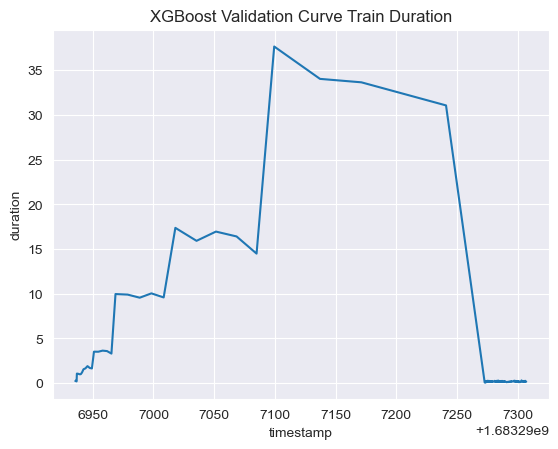

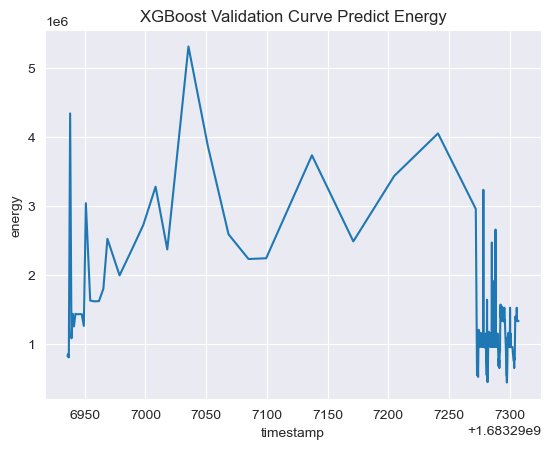

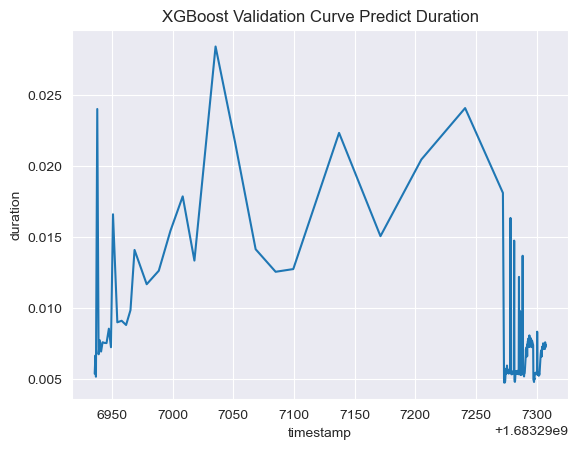

In [50]:
xgb_cv, xgb_rfe, xgb_df, xgb_vc = plot_power_measurements('XGBoost', 'xgb_exp')

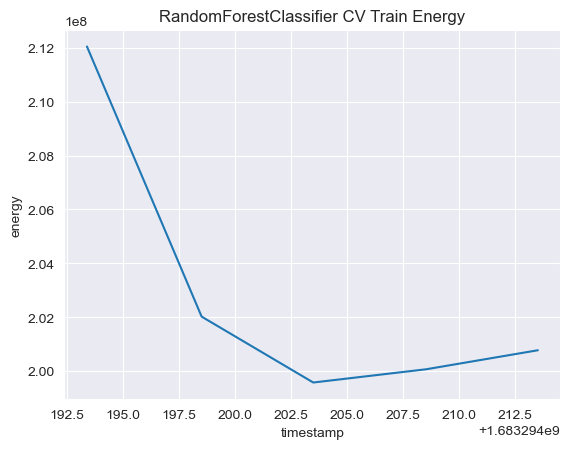

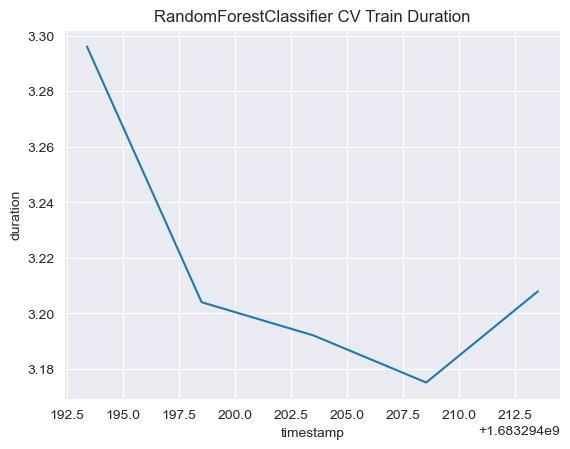

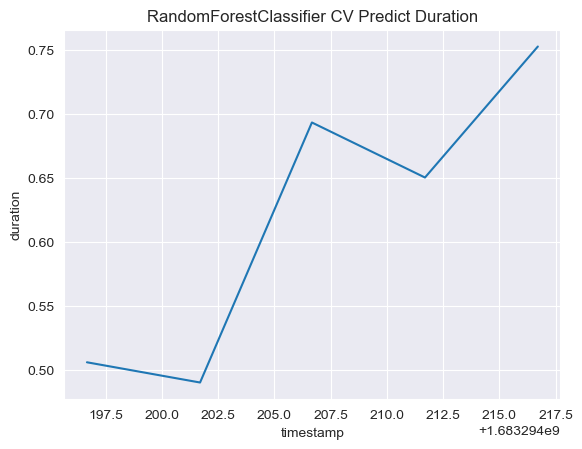

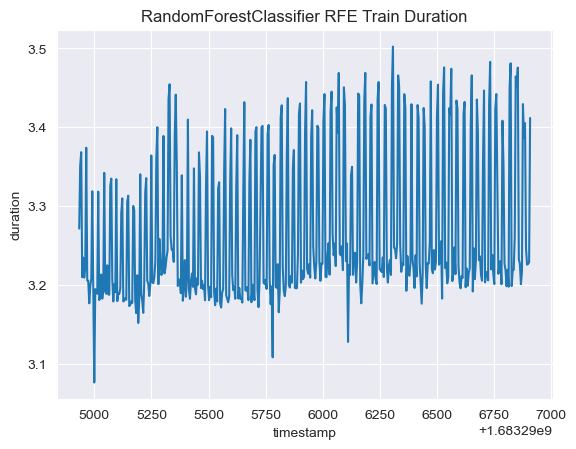

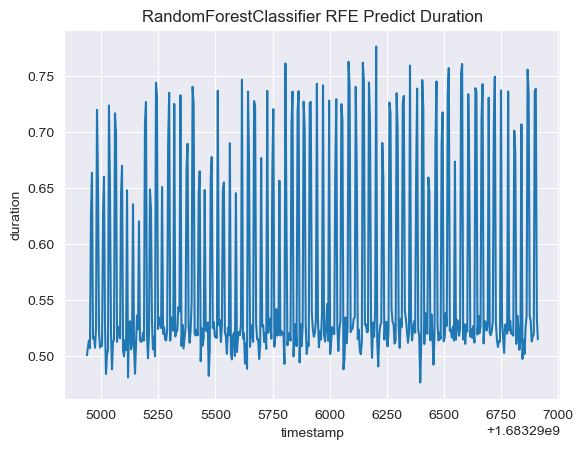

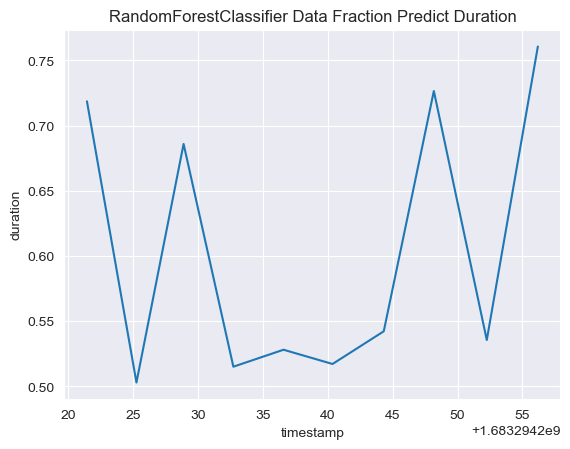

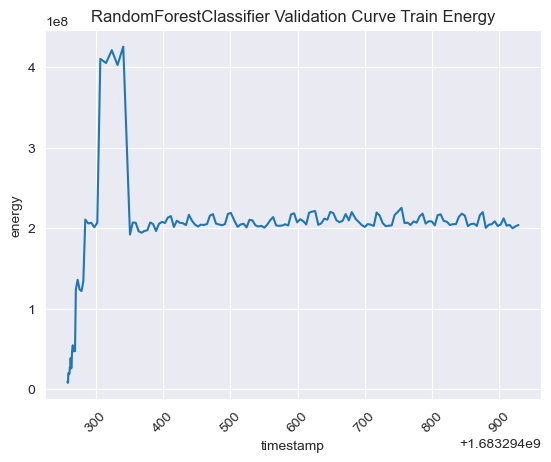

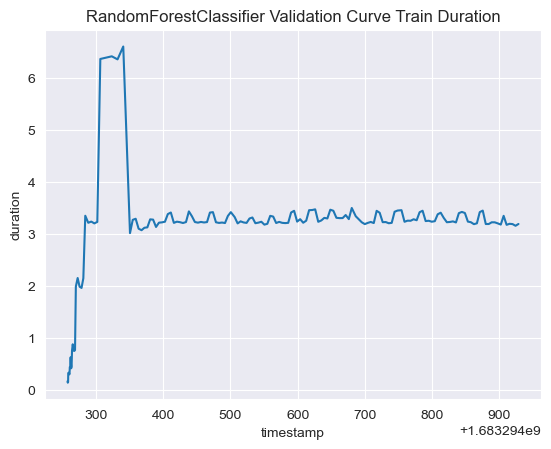

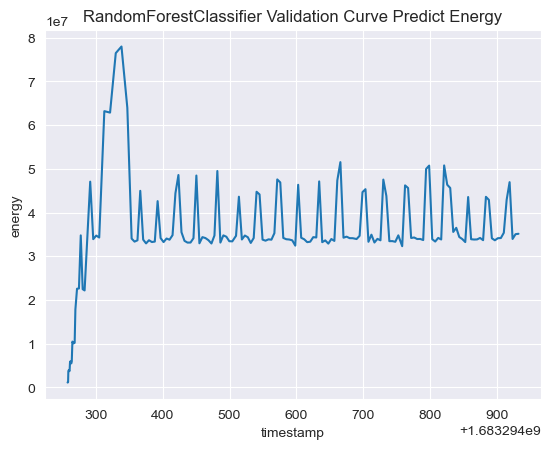

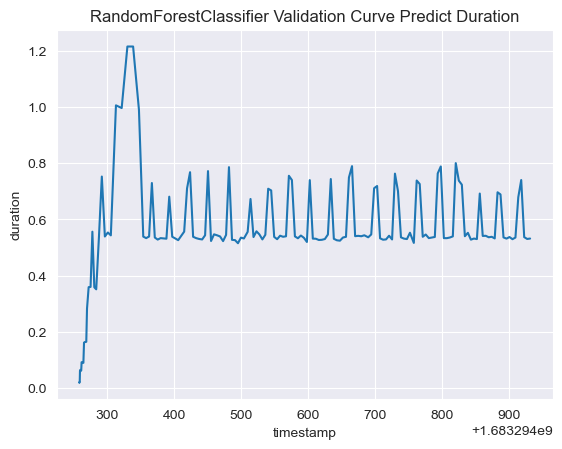

In [51]:
rf_cv, rf_rfe, rf_df, rf_vc = plot_power_measurements('RandomForestClassifier', 'rdf_exp')

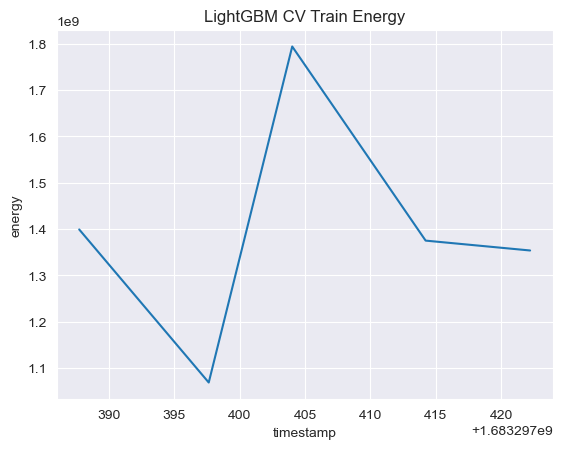

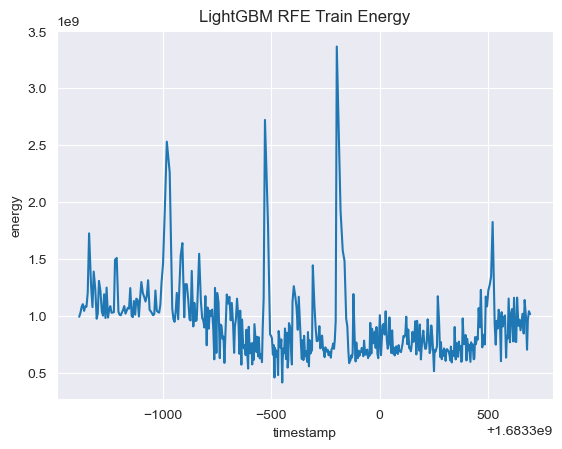

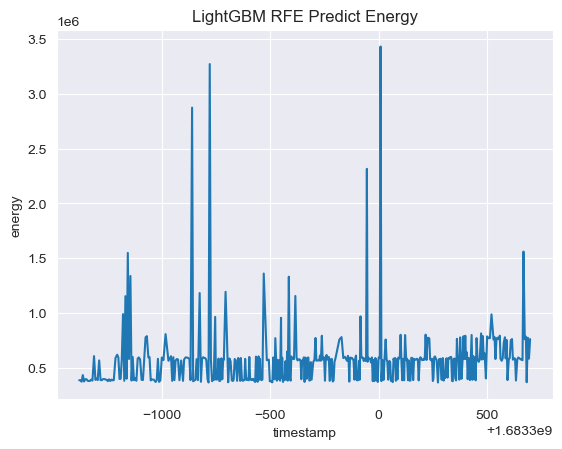

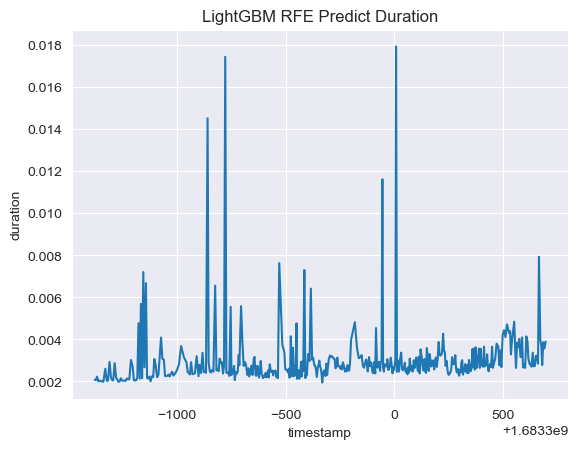

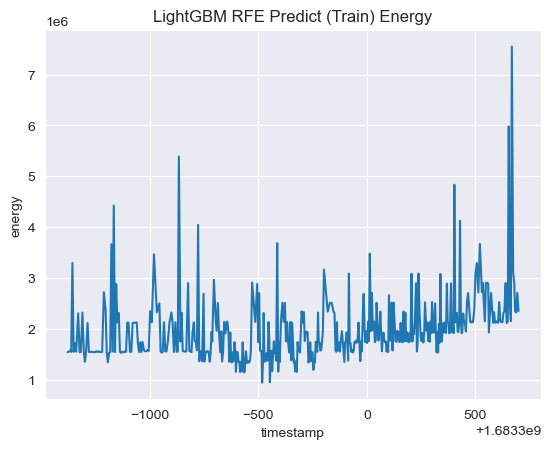

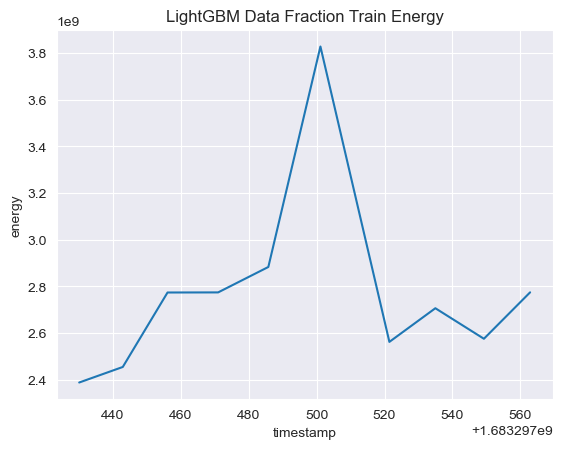

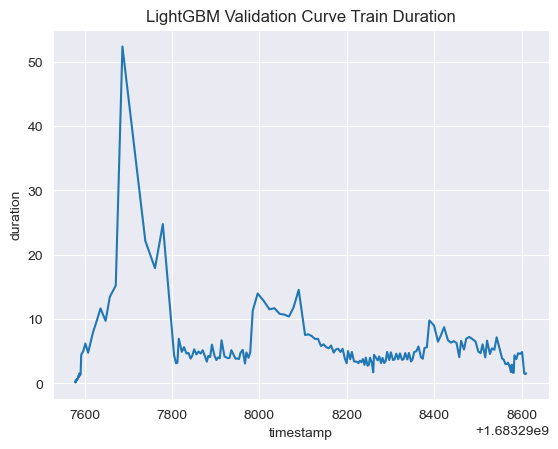

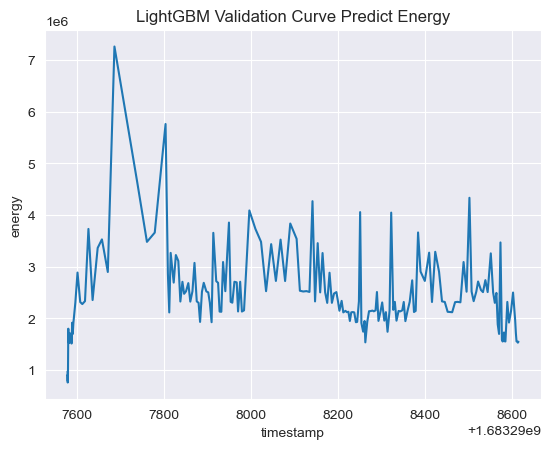

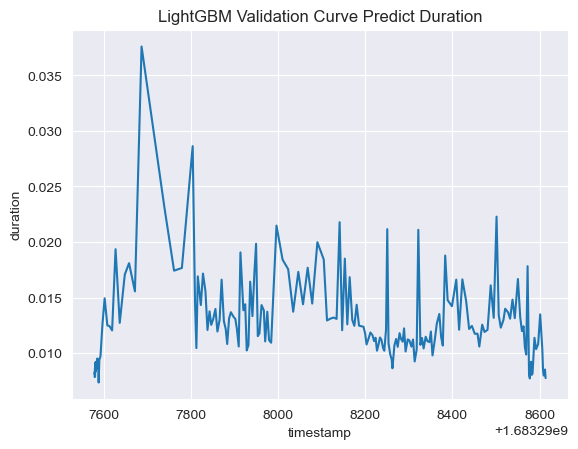

In [52]:
lgbm_cv, lgbm_rfe, lgbm_df, lgbm_vc = plot_power_measurements('LightGBM', 'lgbm_exp')

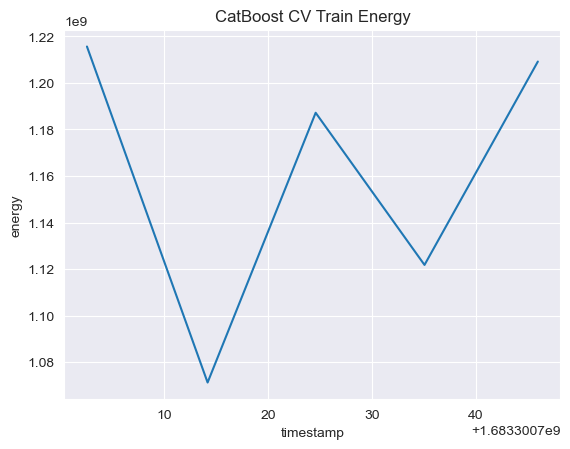

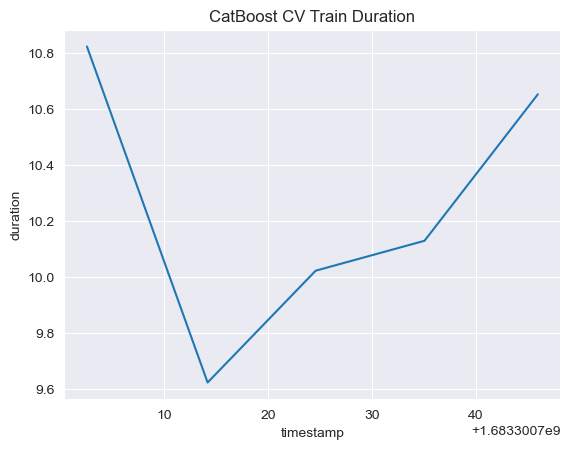

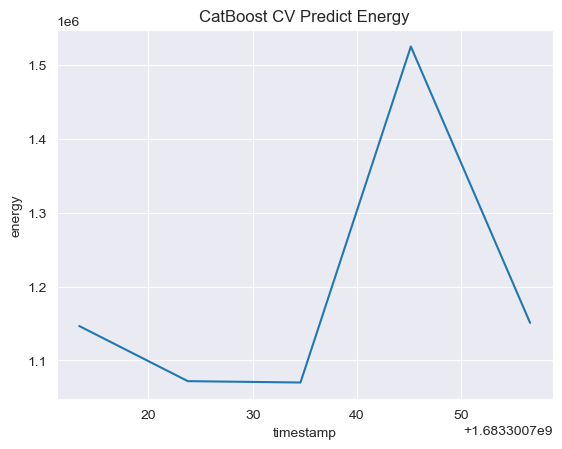

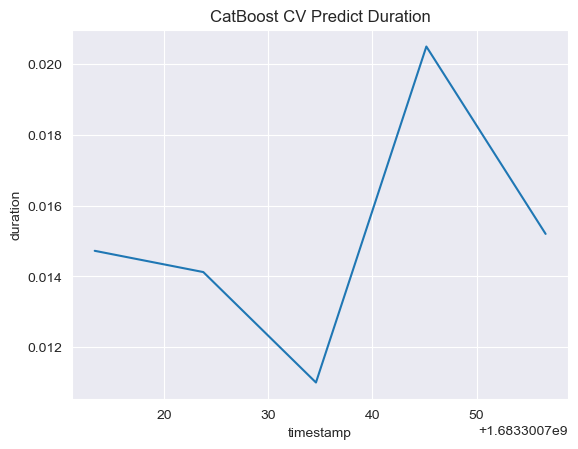

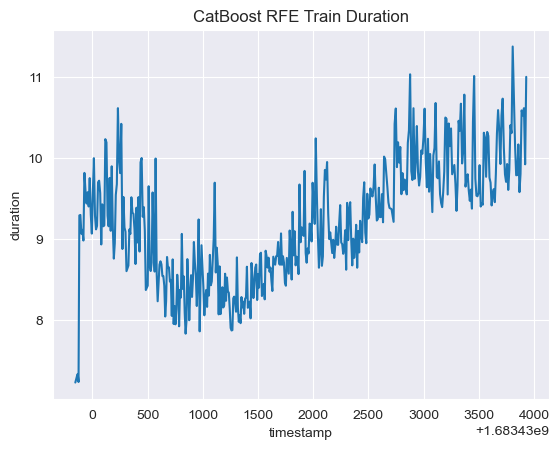

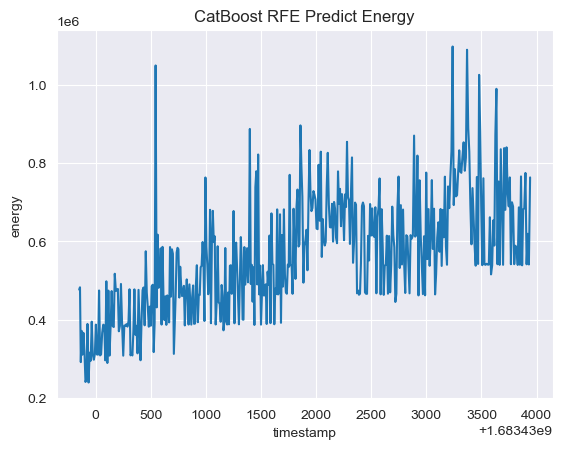

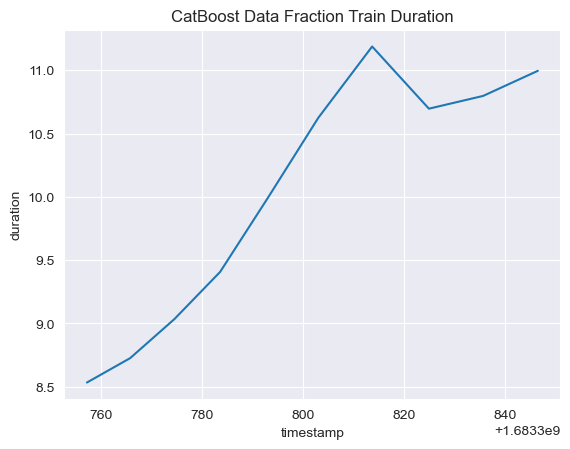

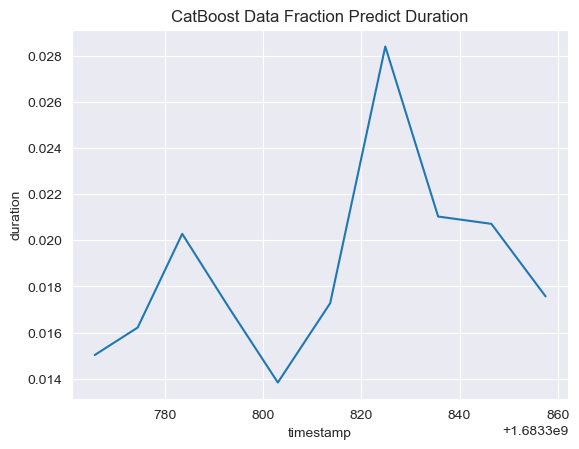

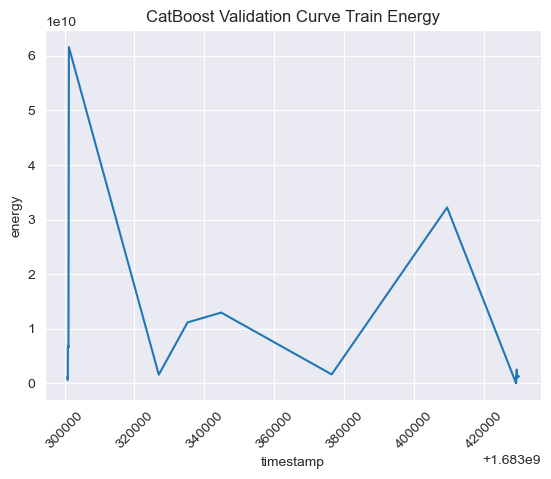

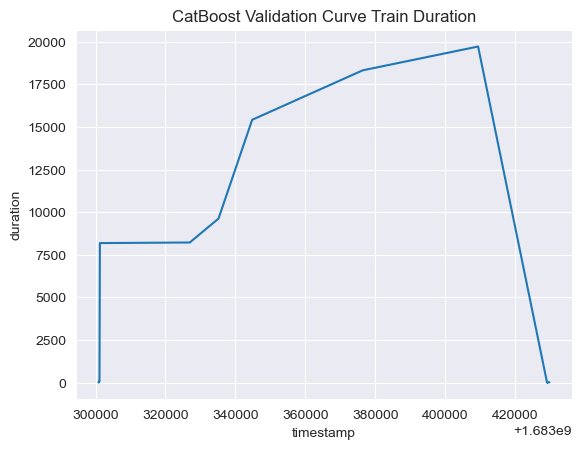

In [88]:
cat_cv, cat_rfe, cat_df, cat_vc = plot_power_measurements('CatBoost', 'cat_exp')

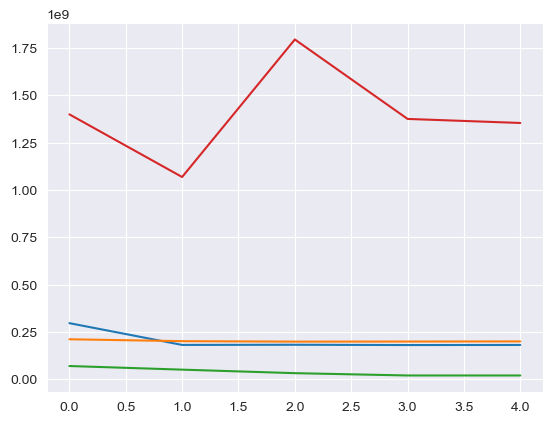

In [67]:
# Compare energy consumption of all models
ada_cv[ada_cv['tag'].str.contains('train')].reset_index()['energy'].plot()
rf_cv[rf_cv['tag'].str.contains('train')].reset_index()['energy'].plot()
xgb_cv[xgb_cv['tag'].str.contains('train')].reset_index()['energy'].plot()
lgbm_cv[lgbm_cv['tag'].str.contains('train')].reset_index()['energy'].plot()
plt.show()
# ada_cv[ada_cv['tag'].str.contains('train')].boxplot(column=['energy'])


In [77]:
ada_rfe[~(ada_rfe['energy'] < 0)][ada_rfe['tag'].str.contains('train')].reset_index()['energy'].plot()
rf_rfe[~(rf_rfe['energy'] < 0)][rf_rfe['tag'].str.contains('train')].reset_index()['energy'].plot()
xgb_rfe[~(xgb_rfe['energy'] < 0)][xgb_rfe['tag'].str.contains('train')].reset_index()['energy'].plot()
lgbm_rfe[~(lgbm_rfe['energy'] < 0)][lgbm_rfe['tag'].str.contains('train')].reset_index()['energy'].plot()

/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_1660/1446377331.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ada_rfe[~(ada_rfe['energy'] < 0)][ada_rfe['tag'].str.contains('train')].reset_index()['energy'].plot()
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_1660/1446377331.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rf_rfe[~(rf_rfe['energy'] < 0)][rf_rfe['tag'].str.contains('train')].reset_index()['energy'].plot()
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_1660/1446377331.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lgbm_rfe[~(lgbm_rfe['energy'] < 0)][lgbm_rfe['tag'].str.contains('train')].reset_index()['energy'].plot()


<AxesSubplot: >

In [82]:
ada_df[~(ada_df['energy'] < 0)][ada_df['tag'].str.contains('train')].reset_index()['energy'].plot()
rf_df[~(rf_df['energy'] < 0)][rf_df['tag'].str.contains('train')].reset_index()['energy'].plot()
lgbm_df[~(lgbm_df['energy'] < 0)][lgbm_df['tag'].str.contains('train')].reset_index()['energy'].plot()
xgb_df[~(xgb_df['energy'] < 0)][xgb_df['tag'].str.contains('train')].reset_index()['energy'].plot()

<AxesSubplot: >

In [86]:
ada_vc[~(ada_vc['energy'] < 0)][ada_vc['tag'].str.contains('train')].reset_index()['energy'].plot()
rf_vc[~(rf_vc['energy'] < 0)][rf_vc['tag'].str.contains('train')].reset_index()['energy'].plot()
lgbm_vc[~(lgbm_vc['energy'] < 0)][lgbm_vc['tag'].str.contains('train')].reset_index()['energy'].plot()
xgb_vc[~(xgb_vc['energy'] < 0)][xgb_vc['tag'].str.contains('train')].reset_index()['energy'].plot()

/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_1660/2032964903.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rf_vc[~(rf_vc['energy'] < 0)][rf_vc['tag'].str.contains('train')].reset_index()['energy'].plot()
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_1660/2032964903.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lgbm_vc[~(lgbm_vc['energy'] < 0)][lgbm_vc['tag'].str.contains('train')].reset_index()['energy'].plot()
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_1660/2032964903.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xgb_vc[~(xgb_vc['energy'] < 0)][xgb_vc['tag'].str.contains('train')].reset_index()['energy'].plot()


<AxesSubplot: >

In [90]:
ada_vc[~(ada_vc['energy'] < 0)][ada_vc['tag'].str.contains('predict')].reset_index()['energy'].plot()
rf_vc[~(rf_vc['energy'] < 0)][rf_vc['tag'].str.contains('predict')].reset_index()['energy'].plot()
lgbm_vc[~(lgbm_vc['energy'] < 0)][lgbm_vc['tag'].str.contains('predict')].reset_index()['energy'].plot()
xgb_vc[~(xgb_vc['energy'] < 0)][xgb_vc['tag'].str.contains('predict')].reset_index()['energy'].plot()

/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_1660/539711131.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rf_vc[~(rf_vc['energy'] < 0)][rf_vc['tag'].str.contains('predict')].reset_index()['energy'].plot()
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_1660/539711131.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lgbm_vc[~(lgbm_vc['energy'] < 0)][lgbm_vc['tag'].str.contains('predict')].reset_index()['energy'].plot()
/var/folders/29/7v6rq2nx74gdfvqq4tdmv6300000gn/T/ipykernel_1660/539711131.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xgb_vc[~(xgb_vc['energy'] < 0)][xgb_vc['tag'].str.contains('predict')].reset_index()['energy'].plot()


<AxesSubplot: >

In [93]:
sns.pairplot(ada_vc[ada_vc['tag'].str.contains('train')], hue="tag")